In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


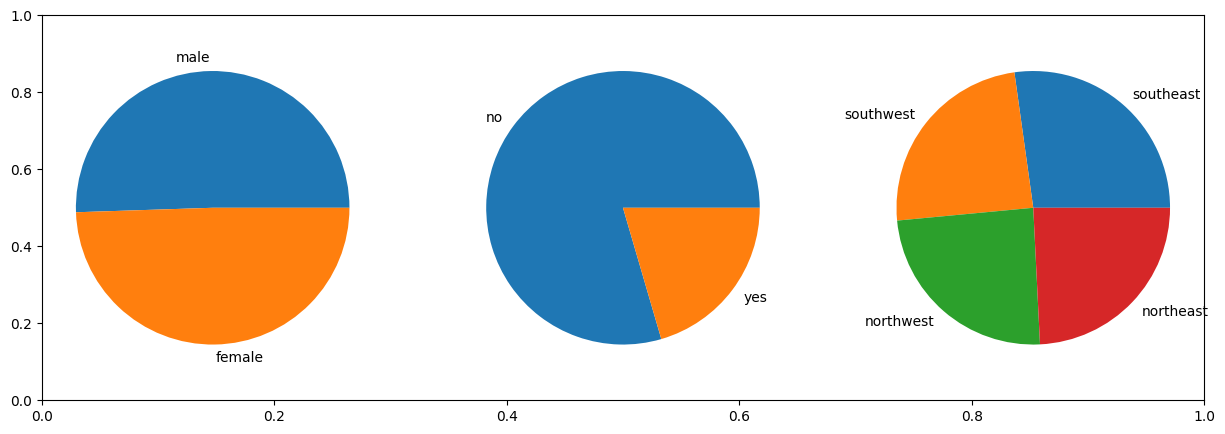

In [8]:
feature = ['sex', 'smoker', 'region']
plt.subplots(figsize=(15,5))
for i, col in enumerate(feature):
    plt.subplot(1, 3, i+1)
    x = df[col].value_counts()
    plt.pie(x.values, labels=x.index)
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

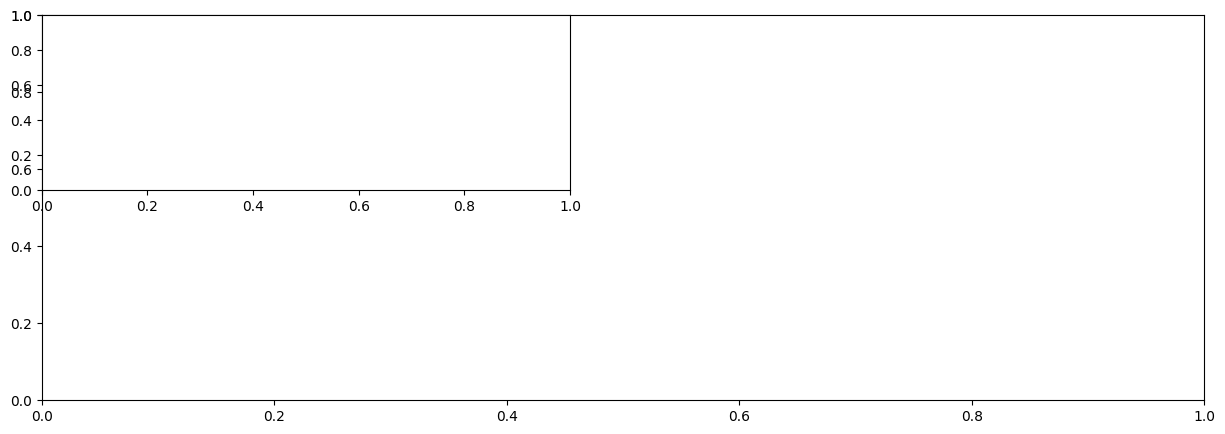

In [9]:
feature = ['sex', 'smoker', 'region', 'children']
plt.subplots(figsize=(15,5))
for i, col in enumerate(feature):
    plt.subplot(2, 2, i+1)
    df.groupby(col).mean()['expenses'].plot.bar()
plt.show()

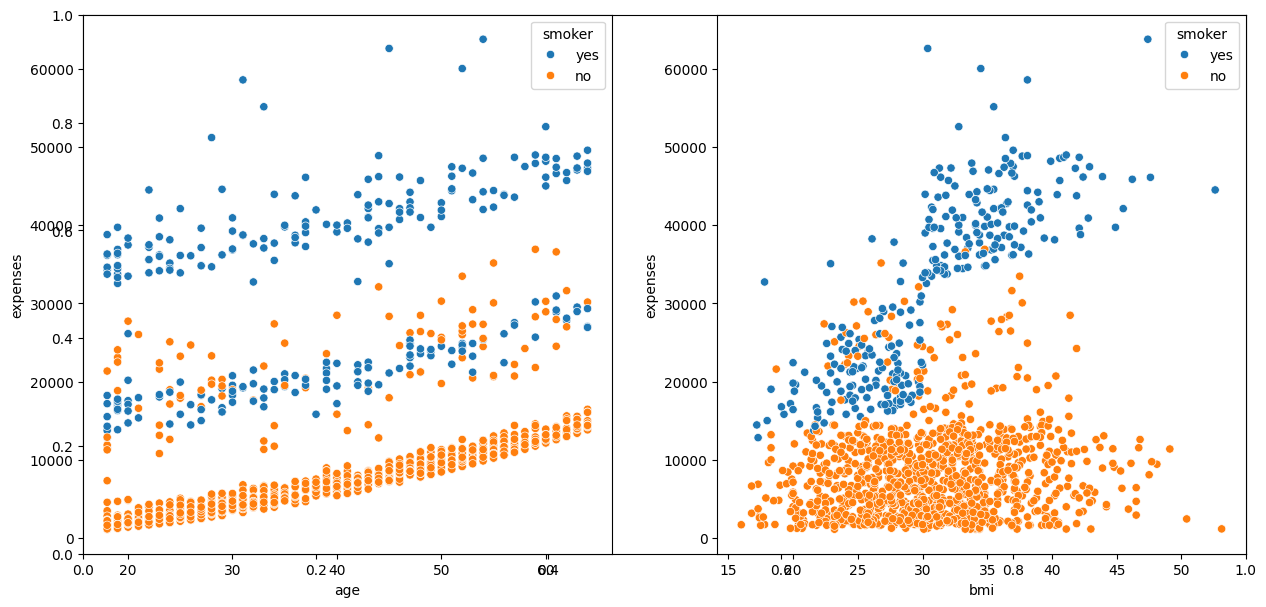

In [10]:
feature = ['age', 'bmi']
plt.subplots(figsize=(15,7))
for i, col in enumerate(feature):
    plt.subplot(1,2, i+1)
    sns.scatterplot(data=df, x=col, y='expenses', hue='smoker')
plt.show()

In [11]:
df.drop_duplicates(inplace=True)

<Axes: ylabel='age'>

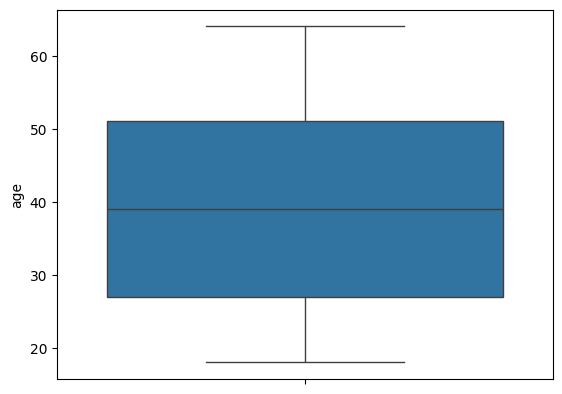

In [12]:
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

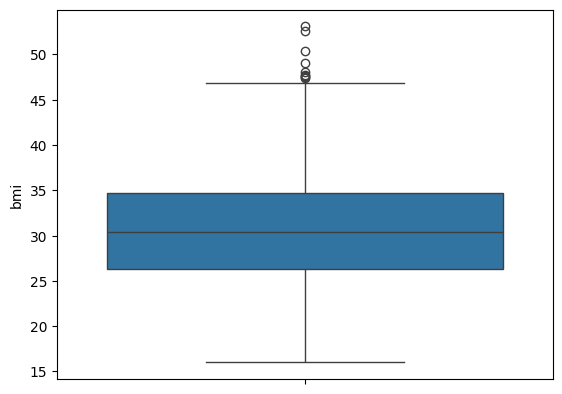

In [13]:
sns.boxplot(df['bmi'])

In [14]:
# remove outlier from bmi
Q1 = df['bmi'].quantile(0.25)
Q2 = df['bmi'].quantile(0.5)
Q3 = df['bmi'].quantile(0.75)

iqr = Q3 - Q1
low = Q1 - 1.5*iqr
high = Q3 + 1.5*iqr
print(low)
print(high)

13.699999999999998
47.300000000000004
